In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import scipy.stats as sts
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Map measurement class
ME = Base.classes.measurement

# Map station class
SA = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#Display row's columns and data in dictionary format for Measurement
first_row = session.query(ME).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28fbb9543a0>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [12]:
#Display row's columns and data in dictionary format for Station
first_row = session.query(SA).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28fbb95d1c0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [13]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

latest_date = session.query(ME.date).order_by(ME.date.desc()).first()
latest_date = latest_date[0]
latest_date

# Calculate the date 1 year ago from today:
year_ago_today = dt.datetime.today() - dt.timedelta(days=366)
year_ago_today

# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=366)

precipitation_oneyearago = session.query(ME.date,ME.prcp).filter(ME.date>=year_ago).all()

precipitation_oneyearago 



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Plot the Results in a Matplotlib bar chart
df= pd.DataFrame(precipitation_oneyearago, columns=['date', 'precipitation'])

df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

df.set_index('date', inplace=True)

df_sort = df.sort_values(['date'], ascending = True)

df_sort = df_sort.dropna()

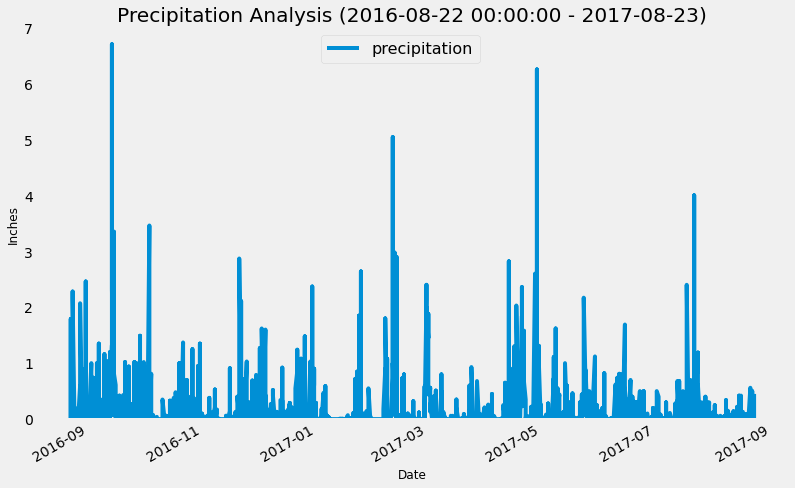

In [18]:
# Plot the Results in a Matplotlib bar chart

ax = df_sort.plot(figsize = (12,8))
plt.legend(bbox_to_anchor = (0.6,1.001), fontsize = "16")
ax.set_title(f"Precipitation Analysis ({year_ago} - {latest_date})")
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Inches", fontsize = 12)

plt.grid()

plt.ylim(0,7)
plt.show()


In [19]:
# Use Pandas & Numpy to calculate the summary statistics for the precipitation data
print(f"The Summary Statistics:")
print(f"--------------------------------------------")
count_numpy = len(df_sort['precipitation'])
print(f"The number of records is {count_numpy}")

mean_numpy = np.mean(df_sort['precipitation'])
print(f"The mean of precipitation is {mean_numpy}")

min_numpy = df_sort['precipitation'].min()
print(f"The min of precipitation is {min_numpy}")

max_numpy = df_sort['precipitation'].max()
print(f"The max of precipitation is {max_numpy}")

median_numpy = np.median(df_sort['precipitation'])
print(f"The median of precipitation is {median_numpy}")

mode_scipy = sts.mode(df_sort['precipitation'])
print(f"The mode of precipitation is {mode_scipy}")

var_numpy = np.var(df_sort['precipitation'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(df_sort['precipitation'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The Summary Statistics:
--------------------------------------------
The number of records is 2021
The mean of precipitation is 0.17727857496288899
The min of precipitation is 0.0
The max of precipitation is 6.7
The median of precipitation is 0.02
The mode of precipitation is ModeResult(mode=array([0.]), count=array([874]))
The population variance using the NumPy module is 0.21259051566664733
The population standard deviation using the NumPy module is 0.4610753904370166


In [20]:
#show the summary statistics for the precipitation data
df_sort.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
session.query(ME.station).distinct().count()

9

In [22]:
# List the stations and the counts in descending order.
stations_activelist = session.query(ME.station,func.count(ME.station)).group_by(ME.station).order_by(func.count(ME.station).desc()).all()
stations_activelist 

# The station has the highest number of observations
station_mostactive = stations_activelist[0][0]
station_mostactive

'USC00519281'

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temp_stats = session.query(func.min(ME.tobs),func.max(ME.tobs),func.avg(ME.tobs)).filter(ME.station == station_mostactive).all()

temp_max = session.query(func.max(ME.tobs)).filter(ME.station == station_mostactive).all()
temp_min = session.query(func.min(ME.tobs)).filter(ME.station == station_mostactive).all()
temp_avg = session.query(func.avg(ME.tobs)).filter(ME.station == station_mostactive).all()

print(f'The most active station {station_mostactive} has temperature statistics: min: {temp_min}, max: {temp_max}, average:{temp_avg}')

The most active station USC00519281 has temperature statistics: min: [(54.0,)], max: [(85.0,)], average:[(71.66378066378067,)]


In [24]:
# Choose the station with the highest number of temperature observations.
stations_tempcount_list = session.query(ME.station,func.count(ME.tobs)).group_by(ME.station).order_by(func.count(ME.tobs).desc()).all()
stations_tempcount_list

# The station has the highest number of observations
station_mostactivetemp = stations_tempcount_list[0][0]
station_mostactivetemp


'USC00519281'

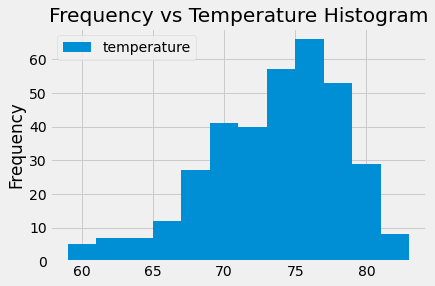

In [25]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_oneyearago = session.query(ME.tobs).filter(ME.date >= year_ago).filter(ME.station == station_mostactivetemp).all()

temperature_observation = pd.DataFrame(temperature_oneyearago, columns=["temperature"])

temperature_observation.plot.hist(bins=12, title = "Frequency vs Temperature Histogram")

plt.show()

## Bonus Challenge Assignment

## Temperature Analysis: Hawaii's June vs December

In [26]:
# Read in the Hawaii temperature data

temperature_df = pd.read_csv('Resources/hawaii_measurements.csv')

In [27]:
temperature_df['month'] = pd.DatetimeIndex(temperature_df['date']).month

temperatures_June = temperature_df.loc[(temperature_df['month'] == 6),'tobs']

temperatures_Dec =  temperature_df.loc[(temperature_df['month'] == 12),'tobs']

print(f'mean of F temperature of June in Hawaii is: {round(temperatures_June.mean(),2)}')
print(f'mean of F temperature of December in Hawaii is: {round(temperatures_Dec.mean(),2)}') 


mean of F temperature of June in Hawaii is: 74.94
mean of F temperature of December in Hawaii is: 71.04


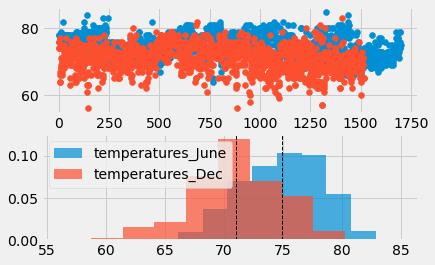

In [28]:
# Generate some fake data to test with

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(temperatures_June)), temperatures_June, label="temperatures_June")
plt.scatter(range(len(temperatures_Dec)), temperatures_Dec, label="temperatures_Dec")


# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(temperatures_June, 10, density=True, alpha=0.7, label="temperatures_June")
plt.hist(temperatures_Dec, 10, density=True, alpha=0.7, label="temperatures_Dec")
plt.axvline(temperatures_June.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(temperatures_Dec.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend(loc='best')  



In [29]:
print(f'We use independent t_test since the data records are independent through time')

sts.ttest_ind(temperatures_June, temperatures_Dec, equal_var=False)

We use independent t_test since the data records are independent through time


Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

In [30]:
print(f'The result of t-test: p-value is bigger than 5% so that the significant difference in temperature means in June and December in Hawaii is rejected statistically.')

The result of t-test: p-value is bigger than 5% so that the significant difference in temperature means in June and December in Hawaii is rejected statistically.


## Temperature Analysis: Summary of your trip

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(ME.tobs), func.avg(ME.tobs), func.max(ME.tobs)).filter(ME.date >= start_date).filter(ME.date <= end_date).all()

#query to get dataset for the last year of the data

tripdate = input(f'please enter your trip date: (YYYY-MM-DD)')
year_ago = dt.datetime.strptime(tripdate, "%Y-%m-%d") - dt.timedelta(days=366)

print(calc_temps(year_ago,tripdate))

data_plot = calc_temps(year_ago,tripdate)

please enter your trip date: (YYYY-MM-DD)2016-12-12
[(56.0, 74.26698606271778, 84.0)]


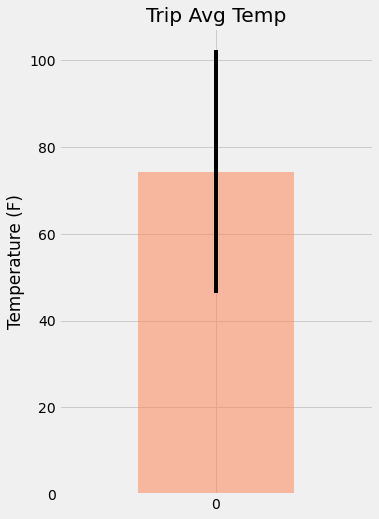

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

data_plot_df = pd.DataFrame(data_plot, columns = ['Min','Avg','Max'])

y_axis = data_plot_df['Avg']

peak_to_peak = data_plot_df['Max'] - data_plot_df['Min']

y_axis.plot(kind='bar', figsize=(5, 8), yerr=peak_to_peak, alpha = 0.5, color = 'coral', title='Trip Avg Temp',rot = 0)

plt.ylabel('Temperature (F)')

plt.show()



##  Daily Rainfall Average

In [37]:
# Calculate the rainfall per weather station using the previous year's matching dates
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

pre_latestdate = dt.datetime.strptime(tripdate, "%Y-%m-%d") - dt.timedelta(days=366)
pre_yearago = pre_latestdate - dt.timedelta(days=366)

preyear_station_precipitation = session.query(ME.station, SA.name, SA.latitude, SA.longitude, ME.prcp).filter(ME.date >= pre_yearago).filter(ME.date <= pre_latestdate).filter(ME.station == SA.station).group_by(ME.station).all()

preyear_station_precipitation_df = pd.DataFrame(preyear_station_precipitation, columns =["Station", "Station Name", "Latidute", "Longitude", "Precipitation Total"])

preyear_station_precipitation_df = preyear_station_precipitation_df.dropna()

preyear_station_precipitation_df

,Station,Station Name,Latidute,Longitude,Precipitation Total
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.00
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,0.12
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,0.07
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,0.83
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,0.10
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,0.07
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,0.01
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,0.08


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(ME.tobs), func.avg(ME.tobs), func.max(ME.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", ME.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# Set the start and end date of the trip

trip_start = dt.datetime.strptime(tripdate, "%Y-%m-%d")
trip_end = trip_start + dt.timedelta(days=14)

# Use the start and end date to create a range of dates

trip_daterange = pd.date_range(trip_start,trip_end)

# Stip off the year and save a list of %m-%d strings
trip_daterange_md = trip_daterange.strftime("%m-%d")

# Loop through the list of %m-%d strings and calculate the normals for each datenormal_list = []

normal_list =[]
for trip_date in trip_daterange_md:
    normal_list.append(*daily_normals(trip_date))
    
normal_list



In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_list_df = pd.DataFrame(normal_list,columns = ["Min Temp", "Avg Temp", "Max Temp"])

normal_list_df["date"] = trip_daterange

normal_list_df = normal_list_df.set_index(['date'])

normal_list_df 

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

normal_list_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, title='Predicted Temperatures for The Trip', rot=45)

plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(loc = 'center')
plt.show()